## Model Training

In [1]:
import os
import pandas   as pd
import numpy    as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
os.chdir("E:/DATA SCIENCE/Capstone Project/Deploy")

In [3]:
fullraw = pd.read_csv("Win_Prediction_Data.csv")

In [4]:
fullraw

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,1-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,3-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,18-Mar-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,4-Mar-19,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,28-Feb-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,27-Jan-19,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [5]:
fullraw.describe(include = 'object')

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Status Code
count,9982,10061,10061,10061,10061,10061,10061,10061
unique,41,67,2555,25,13,43,278,2
top,Others,Solution 32,27-Jul-18,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1763,1439,15,2693,3360,1166,323,6306


### Missing Value Treatment

In [6]:
fullraw.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [7]:
fullraw['Client Category'] = fullraw['Client Category'].fillna(fullraw['Client Category'].mode()[0])

In [8]:
fullraw.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

#### Data PreProcessing


Handling "0" values in Deal_Cost with Median Value

In [9]:
tempmedian = fullraw['Deal Cost'].median(); tempmedian

382352.94

In [10]:
fullraw['Deal Cost'].replace(0.00, tempmedian, inplace = True)

Combine VP Name and Manager Name¶

In [11]:
fullraw['Vp_Manager'] = fullraw["VP Name"] + " " + fullraw["Manager Name"]

### Dropping Column's from the data, which are not going to assist us in our model

In [12]:
fullraw = fullraw.drop(['Deal Date'], axis = 1)

fullraw = fullraw.drop(["VP Name"], axis = 1)

fullraw = fullraw.drop(["Manager Name"], axis = 1)

##### Feature Engineering

Recoding Dependant Variable

In [13]:
fullraw['Deal Status Code'] = np.where(fullraw["Deal Status Code"] == "Won", 1, 0)

In [14]:
fullraw['Deal Status Code'].value_counts()

0    6306
1    3755
Name: Deal Status Code, dtype: int64

In [15]:
fullraw

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Vp_Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,1,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,1,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,60000.00,0,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,60000.00,0,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,80882.35,0,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,L5,588235.29,0,Rudraksh Sharma Rudraksh Sharma
10057,Internal,Solution 6,Sector 20,Others,777058.82,1,Rudraksh Sharma Sharavan Singh
10058,Power ind,Solution 9,Sector 9,L5,588235.29,0,Rudraksh Sharma Rudraksh Sharma
10059,Power ind,Solution 62,Sector 9,L5,3042058.82,1,Man Suddeth Cleotilde Biron


##### Target Gudided Ordinal Encoding

In [16]:
col = ['Client Category', 'Solution Type', 'Sector', 'Location', 'Vp_Manager']

##### Target Encode the categorical Data

In [17]:
for feature in col:
    ordinal_labels_1 = fullraw.groupby(feature)['Deal Status Code'].mean().sort_values().index
    ordinal_labels_2={k:i for i,k in enumerate(ordinal_labels_1,0)}
    fullraw[feature]=fullraw[feature].map(ordinal_labels_2)

fullraw.head(10)  

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Vp_Manager
0,29,35,16,10,150000.00,1,609
1,29,35,16,10,744705.88,1,609
2,39,31,22,12,60000.00,0,247
3,39,31,22,12,60000.00,0,247
4,39,53,22,12,80882.35,0,247
5,39,53,22,12,80882.35,0,247
6,39,31,12,6,526176.47,1,913
7,15,35,1,10,409705.88,0,397
8,36,41,8,6,1032352.94,1,929
9,39,31,22,12,558823.53,0,133


In [18]:
col = ['Client_Category', 'Solution_Type', 'Sector', 'Location','Deal_Cost','Deal_Status','VPManager']

In [19]:
fullraw.columns = col 

##### Splitting

In [20]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(fullraw, train_size = 0.80, random_state = 137)

#### Sampling into X and Y

In [21]:
depvar = "Deal_Status"

In [22]:
TrainX = Train.drop(depvar, axis = 1).copy()

TrainY = Train[depvar].copy()

In [23]:
TestX = Test.drop(depvar, axis= 1).copy()

TestY = Test[depvar].copy()

In [24]:
TestX.shape

(2013, 6)

In [25]:
TestY

8144    1
2043    0
2803    0
7639    1
9557    0
       ..
9139    0
905     0
6238    0
7623    0
9010    0
Name: Deal_Status, Length: 2013, dtype: int32

#### Model_Building

#### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
Model_rf = RandomForestClassifier(random_state = 777).fit(TrainX, TrainY)

### Prediction & Validation on Test set

In [28]:
Test_Pred = Model_rf.predict(TestX)

In [29]:
Confu_mat = pd.crosstab(TestY, Test_Pred);Confu_mat

col_0,0,1
Deal_Status,,
0,1202,56
1,248,507


##### Visualize Confusion_Matrix

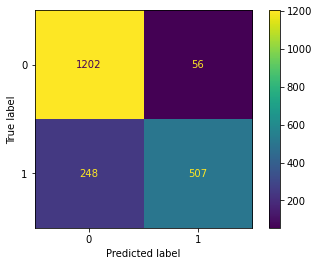

In [30]:
Cm1 = confusion_matrix(TestY, Test_Pred, labels = Model_rf.classes_ )

disp = ConfusionMatrixDisplay( confusion_matrix = Cm1, display_labels = Model_rf.classes_)
disp.plot()

In [31]:
print(classification_report(TestY, Test_Pred))

a = accuracy_score(TestY, Test_Pred)
print("Accuracy Score:", a)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1258
           1       0.90      0.67      0.77       755

    accuracy                           0.85      2013
   macro avg       0.86      0.81      0.83      2013
weighted avg       0.86      0.85      0.84      2013

Accuracy Score: 0.8489816194734228


#### Creating Pickle File

In [32]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(Model_rf, pickle_out)
pickle_out.close()

In [33]:
TestX.head()

,Client_Category,Solution_Type,Sector,Location,Deal_Cost,VPManager
8144,39,21,22,12,147058.82,391
2043,32,26,3,10,147058.82,494
2803,33,30,12,6,1441176.47,317
7639,20,36,20,6,294117.65,579
9557,24,23,17,6,470588.24,402


In [34]:
Model_rf.predict([[39,21,22,12,147058.82,391]])

array([0])